<a href="https://colab.research.google.com/github/chebil/stat/blob/main/part3/ch07_comparing_means.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.2 Comparing Means: t-Tests

This section covers tests for comparing the means of two populations - one of the most common statistical procedures.

## The Two-Sample Problem

### Setup

We have:
- **Group 1**: n₁ observations with mean x̄₁ and std s₁  
- **Group 2**: n₂ observations with mean x̄₂ and std s₂

### Question

Do these groups have different population means?

### Hypotheses

- **H₀**: μ₁ = μ₂ (no difference)
- **H₁**: μ₁ ≠ μ₂ (two-tailed) OR μ₁ > μ₂ OR μ₁ < μ₂ (one-tailed)

## Case 1: Known Population Variances (Rare)

If we somehow know σ₁² and σ₂², use the **Z-test**:

$$
z = \frac{(\bar{x}_1 - \bar{x}_2) - 0}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}} \sim N(0, 1)
$$

under H₀: μ₁ = μ₂.

## Case 2: Equal Unknown Variances (Pooled t-Test)

### Assumption

σ₁² = σ₂² = σ² (common variance, but unknown)

### Pooled Variance Estimator

$$
s_p^2 = \frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}
$$

This combines information from both samples.

### Test Statistic

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{s_p\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} \sim t_{n_1+n_2-2}
$$

### Python Example

Two-Sample t-Test (Equal Variances Assumed)
Control:   n=10, mean=24.90, std=1.91
Treatment: n=10, mean=30.60, std=1.51

H₀: μ_control = μ_treatment
H₁: μ_control ≠ μ_treatment

Pooled standard deviation: 1.721
Standard error of difference: 0.770
t-statistic: -7.407
Degrees of freedom: 18
P-value: 0.000001

Decision: Reject H₀ (p = 0.0000 < 0.05)
Conclusion: Treatment mean is significantly different from control.
Treatment appears to increase the outcome by 5.7 units.

Verification (scipy): t = -7.407, p = 0.000001

95% CI for (μ₁ - μ₂): [-7.32, -4.08]


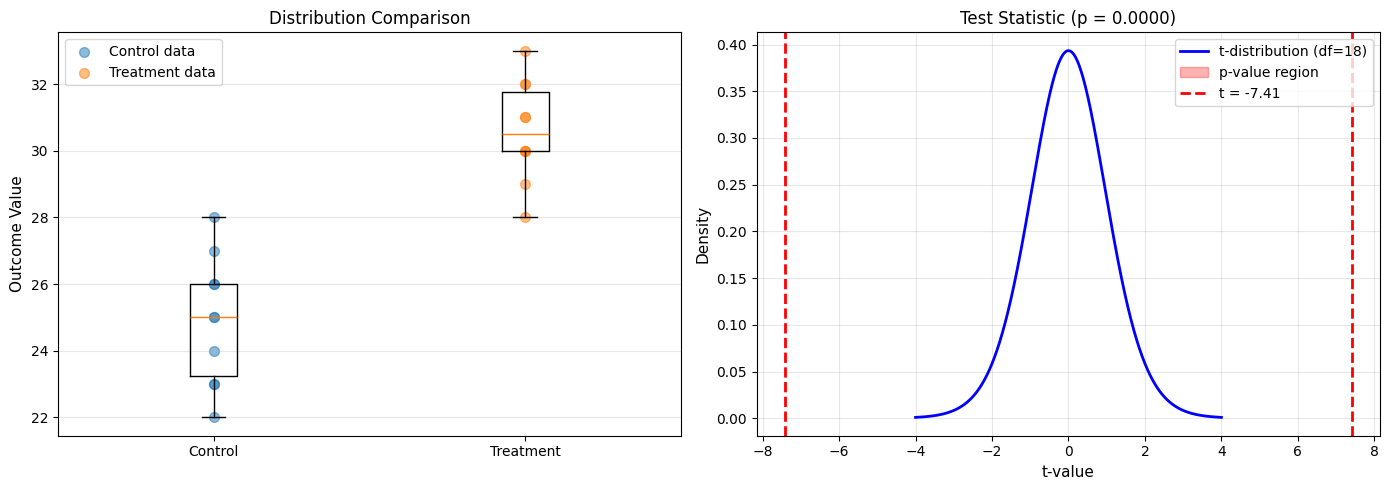

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(42)

# Two groups: Control vs Treatment
control = np.array([23, 25, 22, 28, 26, 24, 27, 25, 23, 26])
treatment = np.array([30, 32, 28, 31, 29, 33, 30, 32, 31, 30])

n1 = len(control)
n2 = len(treatment)
mean1 = np.mean(control)
mean2 = np.mean(treatment)
std1 = np.std(control, ddof=1)
std2 = np.std(treatment, ddof=1)

print("Two-Sample t-Test (Equal Variances Assumed)")
print("="*60)
print(f"Control:   n={n1}, mean={mean1:.2f}, std={std1:.2f}")
print(f"Treatment: n={n2}, mean={mean2:.2f}, std={std2:.2f}")
print()
print(f"H₀: μ_control = μ_treatment")
print(f"H₁: μ_control ≠ μ_treatment")
print()

# Pooled variance
sp2 = ((n1-1)*std1**2 + (n2-1)*std2**2) / (n1 + n2 - 2)
sp = np.sqrt(sp2)

print(f"Pooled standard deviation: {sp:.3f}")

# Test statistic
se_diff = sp * np.sqrt(1/n1 + 1/n2)
t_stat = (mean1 - mean2) / se_diff
df = n1 + n2 - 2

print(f"Standard error of difference: {se_diff:.3f}")
print(f"t-statistic: {t_stat:.3f}")
print(f"Degrees of freedom: {df}")

# P-value (two-tailed)
p_value = 2 * stats.t.cdf(t_stat, df)  # t_stat is negative

print(f"P-value: {p_value:.6f}")
print()

# Decision
alpha = 0.05
if p_value < alpha:
    print(f"Decision: Reject H₀ (p = {p_value:.4f} < {alpha})")
    print(f"Conclusion: Treatment mean is significantly different from control.")
    print(f"Treatment appears to increase the outcome by {mean2-mean1:.1f} units.")
else:
    print(f"Decision: Fail to reject H₀ (p = {p_value:.4f} ≥ {alpha})")
    print(f"Conclusion: No significant difference detected.")

# Verify with scipy
t_scipy, p_scipy = stats.ttest_ind(control, treatment, equal_var=True)
print(f"\nVerification (scipy): t = {t_scipy:.3f}, p = {p_scipy:.6f}")

# Confidence interval for the difference
t_crit = stats.t.ppf(1 - alpha/2, df)
ci_lower = (mean1 - mean2) - t_crit * se_diff
ci_upper = (mean1 - mean2) + t_crit * se_diff

print(f"\n95% CI for (μ₁ - μ₂): [{ci_lower:.2f}, {ci_upper:.2f}]")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Box plots
ax1.boxplot([control, treatment], tick_labels=['Control', 'Treatment'])
ax1.scatter(np.ones(n1), control, alpha=0.5, s=50, label='Control data')
ax1.scatter(np.ones(n2)*2, treatment, alpha=0.5, s=50, label='Treatment data')
ax1.set_ylabel('Outcome Value', fontsize=11)
ax1.set_title('Distribution Comparison', fontsize=12)
ax1.grid(axis='y', alpha=0.3)
ax1.legend()

# t-distribution with test statistic
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

ax2.plot(x, y, 'b-', linewidth=2, label=f't-distribution (df={df})')
ax2.fill_between(x[x <= t_stat], 0, stats.t.pdf(x[x <= t_stat], df),
                  alpha=0.3, color='red', label='p-value region')
ax2.fill_between(x[x >= -t_stat], 0, stats.t.pdf(x[x >= -t_stat], df),
                  alpha=0.3, color='red')
ax2.axvline(t_stat, color='red', linestyle='--', linewidth=2,
            label=f't = {t_stat:.2f}')
ax2.axvline(-t_stat, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('t-value', fontsize=11)
ax2.set_ylabel('Density', fontsize=11)
ax2.set_title(f'Test Statistic (p = {p_value:.4f})', fontsize=12)
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('two_sample_ttest.png', dpi=150, bbox_inches='tight')
plt.show()

## Case 3: Unequal Variances (Welch's t-Test)

### When to Use

When σ₁² ≠ σ₂² (different population variances)

### Test Statistic

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

### Degrees of Freedom (Welch-Satterthwaite)

A complicated formula:

$$
\text{df} = \frac{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}\right)^2}{\frac{(s_1^2/n_1)^2}{n_1-1} + \frac{(s_2^2/n_2)^2}{n_2-1}}
$$

### Python Example

In [3]:
import numpy as np
from scipy import stats

np.random.seed(123)

# Groups with different variances
group_A = np.random.normal(100, 10, 30)  # std = 10
group_B = np.random.normal(105, 20, 40)  # std = 20 (more variable)

print("Welch's t-Test (Unequal Variances)")
print("="*60)
print(f"Group A: n={len(group_A)}, mean={np.mean(group_A):.2f}, std={np.std(group_A, ddof=1):.2f}")
print(f"Group B: n={len(group_B)}, mean={np.mean(group_B):.2f}, std={np.std(group_B, ddof=1):.2f}")
print()

# Scipy automatically uses Welch's test by default
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)

print(f"t-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")
print()

if p_value < 0.05:
    print("Decision: Reject H₀")
    print("Conclusion: Groups have significantly different means.")
else:
    print("Decision: Fail to reject H₀")
    print("Conclusion: No significant difference detected.")

# Compare with pooled t-test (wrong in this case!)
t_pooled, p_pooled = stats.ttest_ind(group_A, group_B, equal_var=True)
print(f"\nIf we had (incorrectly) assumed equal variances:")
print(f"  Pooled t-test: t = {t_pooled:.3f}, p = {p_pooled:.4f}")
print(f"  Welch's t-test: t = {t_stat:.3f}, p = {p_value:.4f}")
print(f"\nDifference in p-values: {abs(p_pooled - p_value):.4f}")

Welch's t-Test (Unequal Variances)
Group A: n=30, mean=100.45, std=11.87
Group B: n=40, mean=107.15, std=22.98

t-statistic: -1.583
P-value: 0.1185

Decision: Fail to reject H₀
Conclusion: No significant difference detected.

If we had (incorrectly) assumed equal variances:
  Pooled t-test: t = -1.456, p = 0.1500
  Welch's t-test: t = -1.583, p = 0.1185

Difference in p-values: 0.0315


## Case 4: Paired t-Test

### When to Use

When observations are **paired** or **matched**:
- Before-after measurements on same subjects
- Matched pairs (twins, siblings)
- Two measurements on same unit

### Key Idea

Compute **differences** d = x₁ - x₂ for each pair, then test whether mean difference = 0.

### Test Statistic

$$
t = \frac{\bar{d}}{s_d/\sqrt{n}} \sim t_{n-1}
$$

where:
- \(\bar{d}\) = mean of differences
- \(s_d\) = standard deviation of differences
- n = number of pairs

### Python Example

Paired t-Test: Weight Loss Study
Subject | Before | After | Difference
------------------------------------------------------------
   A    |    85  |   82  |     +3
   B    |    92  |   88  |     +4
   C    |    78  |   76  |     +2
   D    |    88  |   85  |     +3
   E    |    95  |   91  |     +4
   F    |    82  |   80  |     +2
   G    |    90  |   87  |     +3
   H    |    87  |   84  |     +3
   I    |    93  |   90  |     +3
   J    |    86  |   83  |     +3

Mean difference: 3.00 kg
Std of differences: 0.67 kg

H₀: μ_difference = 0 (no weight change)
H₁: μ_difference ≠ 0 (weight changed)

t-statistic: 14.230
Degrees of freedom: 9
P-value: 0.0000

Decision: Reject H₀ (p = 0.0000 < 0.05)
Conclusion: Significant weight change detected.
Average loss: 3.0 kg

Verification (scipy): t = 14.230, p = 0.0000

95% CI for mean difference: [2.52, 3.48] kg


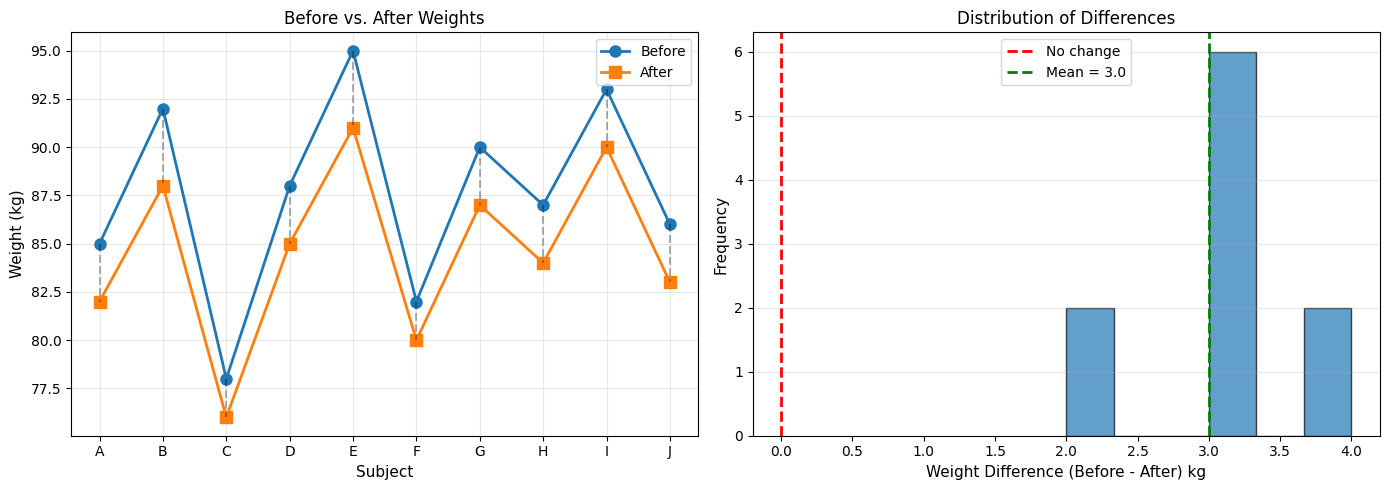

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(42)

# Before-after weight loss study
subjects = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
before = np.array([85, 92, 78, 88, 95, 82, 90, 87, 93, 86])
after = np.array([82, 88, 76, 85, 91, 80, 87, 84, 90, 83])

print("Paired t-Test: Weight Loss Study")
print("="*60)
print("Subject | Before | After | Difference")
print("-" * 60)
for i, subj in enumerate(subjects):
    print(f"   {subj}    |  {before[i]:4.0f}  |  {after[i]:3.0f}  |    {before[i]-after[i]:+3.0f}")

# Compute differences
differences = before - after
n = len(differences)
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)

print()
print(f"Mean difference: {mean_diff:.2f} kg")
print(f"Std of differences: {std_diff:.2f} kg")
print()
print(f"H₀: μ_difference = 0 (no weight change)")
print(f"H₁: μ_difference ≠ 0 (weight changed)")
print()

# Test statistic
se_diff = std_diff / np.sqrt(n)
t_stat = mean_diff / se_diff
df = n - 1
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

print(f"t-statistic: {t_stat:.3f}")
print(f"Degrees of freedom: {df}")
print(f"P-value: {p_value:.4f}")
print()

if p_value < 0.05:
    print(f"Decision: Reject H₀ (p = {p_value:.4f} < 0.05)")
    print(f"Conclusion: Significant weight change detected.")
    print(f"Average loss: {mean_diff:.1f} kg")
else:
    print(f"Decision: Fail to reject H₀ (p = {p_value:.4f} ≥ 0.05)")
    print(f"Conclusion: No significant weight change.")

# Verify with scipy
t_scipy, p_scipy = stats.ttest_rel(before, after)
print(f"\nVerification (scipy): t = {t_scipy:.3f}, p = {p_scipy:.4f}")

# Confidence interval
t_crit = stats.t.ppf(0.975, df)
ci_lower = mean_diff - t_crit * se_diff
ci_upper = mean_diff + t_crit * se_diff
print(f"\n95% CI for mean difference: [{ci_lower:.2f}, {ci_upper:.2f}] kg")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Before-after plot
x_pos = np.arange(n)
ax1.plot(x_pos, before, 'o-', linewidth=2, markersize=8, label='Before')
ax1.plot(x_pos, after, 's-', linewidth=2, markersize=8, label='After')
for i in range(n):
    ax1.plot([i, i], [before[i], after[i]], 'k--', alpha=0.3)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(subjects)
ax1.set_ylabel('Weight (kg)', fontsize=11)
ax1.set_xlabel('Subject', fontsize=11)
ax1.set_title('Before vs. After Weights', fontsize=12)
ax1.legend()
ax1.grid(alpha=0.3)

# Differences distribution
ax2.hist(differences, bins=6, edgecolor='black', alpha=0.7)
ax2.axvline(0, color='red', linestyle='--', linewidth=2, label='No change')
ax2.axvline(mean_diff, color='green', linestyle='--', linewidth=2, 
            label=f'Mean = {mean_diff:.1f}')
ax2.set_xlabel('Weight Difference (Before - After) kg', fontsize=11)
ax2.set_ylabel('Frequency', fontsize=11)
ax2.set_title('Distribution of Differences', fontsize=12)
ax2.legend()
ax2.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('paired_ttest.png', dpi=150, bbox_inches='tight')
plt.show()

## Choosing the Right Test

### Decision Tree

```
Comparing two means?
├─ Same subjects (paired)?
│  └─ YES → Paired t-test
│
└─ NO (independent groups)
   ├─ Variances equal?
   │  ├─ YES → Pooled t-test
   │  └─ NO → Welch's t-test
   │
   └─ Don't know → Use Welch's (safer default)
   ```

### Testing for Equal Variances

Use **Levene's test** or **F-test** (covered in section 7.3)

## Effect Size: Cohen's d

### Why Effect Size Matters

P-values tell us **if** there's a difference, but not **how big** it is.

### Cohen's d

Standardized mean difference:

$$
d = \frac{\bar{x}_1 - \bar{x}_2}{s_p}
$$

### Interpretation

| |d| | Effect Size |
|-----|-------------|
| 0.2 | Small |
| 0.5 | Medium |
| 0.8 | Large |

### Python Example

In [5]:
import numpy as np
from scipy import stats

def cohens_d(group1, group2):
    """Calculate Cohen's d effect size."""
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    
    # Pooled standard deviation
    pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
    
    # Cohen's d
    d = (np.mean(group1) - np.mean(group2)) / pooled_std
    
    return d

# Example from earlier
control = np.array([23, 25, 22, 28, 26, 24, 27, 25, 23, 26])
treatment = np.array([30, 32, 28, 31, 29, 33, 30, 32, 31, 30])

d = cohens_d(control, treatment)

print(f"Cohen's d = {d:.3f}")
if abs(d) < 0.2:
    effect = "negligible"
elif abs(d) < 0.5:
    effect = "small"
elif abs(d) < 0.8:
    effect = "medium"
else:
    effect = "large"
    
print(f"Effect size: {effect}")
print(f"\nInterpretation: The treatment effect is {abs(d):.1f} standard deviations.")

Cohen's d = -3.312
Effect size: large

Interpretation: The treatment effect is 3.3 standard deviations.


## Summary

### Test Selection Guide

| Situation | Test | Function |
|-----------|------|----------|
| One sample, test mean | One-sample t-test | `stats.ttest_1samp()` |
| Two independent, equal var | Pooled t-test | `stats.ttest_ind(equal_var=True)` |
| Two independent, unequal var | Welch's t-test | `stats.ttest_ind(equal_var=False)` |
| Two paired samples | Paired t-test | `stats.ttest_rel()` |

### Key Points

✅ Always check assumptions (normality, equal variance)  
✅ Report effect sizes, not just p-values  
✅ Use Welch's test as default for independent samples  
✅ Paired tests are more powerful when applicable  
✅ Visualize data before testing  

### Common Mistakes

❌ Using independent t-test on paired data  
❌ Assuming equal variances without checking  
❌ Ignoring effect size  
❌ Over-interpreting small p-values in large samples